In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [15]:
df = pd.read_csv('preprocessed_data_name_add.csv', encoding='euc-kr')
df['Owner_Type'].value_counts()

First             5092
Second             983
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [16]:
df.head()

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/L),Engine(CC),Power(bhp),Brand,Country,Continent,Price_Cat,City_population,Name
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,Maruti,India,Asia,c1,20961,Maruti Wagon R LXI CNG
1,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,Hyundai,Korea,Asia,c4,6987,Hyundai Creta 1.6 CRDi SX Option
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,Honda,Japan,Asia,c2,11503,Honda Jazz V
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,Maruti,India,Asia,c3,11503,Maruti Ertiga VDI
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,Audi,Germany,Europe,c4,2935,Audi A4 New 2.0 TDI Multitronic


first_owners = df[df['Owner_Type'] == 'First']
non_first_owners = df[df['Owner_Type'] != 'First']


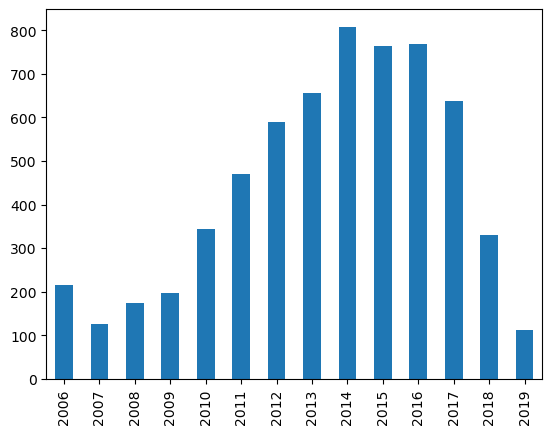

In [17]:
df.loc[df['Year'] < 2006, 'Year'] = 2006
df["Year"].value_counts().sort_index().plot(kind='bar')

df['Fuel_Group'] = df['Fuel_Type'].replace(['CNG', 'LPG', 'Electric'], 'etc')
df["Fuel_Group"].value_counts()

owner_type_mapping = {'First': 'First', 'Second': 'Second', 'Third': 'Third & Above', 'Fourth & Above': 'Third & Above'}
df['Owner_Group'] = df['Owner_Type'].map(owner_type_mapping)
df["Owner_Group"].value_counts()

df['Seat_Group'] = df['Seats'].apply(lambda x: 'small' if x <= 5.0 else 'large')

새로운 파생 변수에 대해 범주 데이터 알맞게 설정됨

In [18]:
display(df['Fuel_Group'].unique())
display(df['Fuel_Type'].unique())
display(df['Owner_Group'].unique())
display(df['Owner_Type'].unique())
display(df['Seat_Group'].unique())
display(df['Seats'].unique())

array(['etc', 'Diesel', 'Petrol'], dtype=object)

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

array(['First', 'Second', 'Third & Above'], dtype=object)

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

array(['small', 'large'], dtype=object)

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.])

In [7]:
df.head()

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/L),Engine(CC),Power(bhp),Brand,Country,Continent,Price_Cat,City_population,Fuel_Group,Owner_Group,Seat_Group
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,Maruti,India,Asia,c1,20961,etc,First,small
1,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,Hyundai,Korea,Asia,c4,6987,Diesel,First,small
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,Honda,Japan,Asia,c2,11503,Petrol,First,small
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,Maruti,India,Asia,c3,11503,Diesel,First,large
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,Audi,Germany,Europe,c4,2935,Diesel,Second,small


## Owner_Type

<Axes: xlabel='Owner_Type', ylabel='count'>

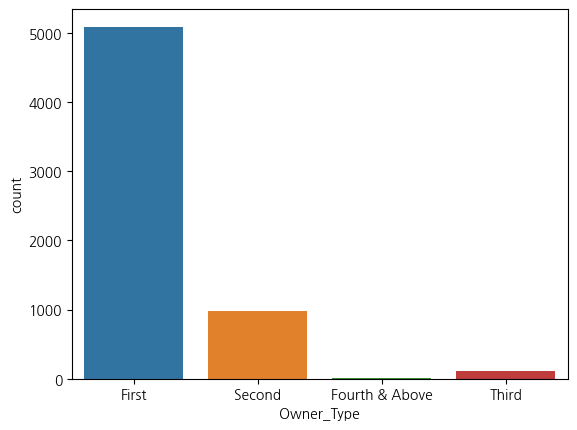

In [221]:
sns.countplot(x='Owner_Type', data=df)

In [222]:
# df['Owner_Group'] = df['Owner_Type'].apply(lambda x: 1 if x == 'First' else 2)
# sns.countplot(x='Owner_Group', data=df)

In [223]:
df['Owner_Group'].unique()

array(['First', 'Second', 'Third & Above'], dtype=object)

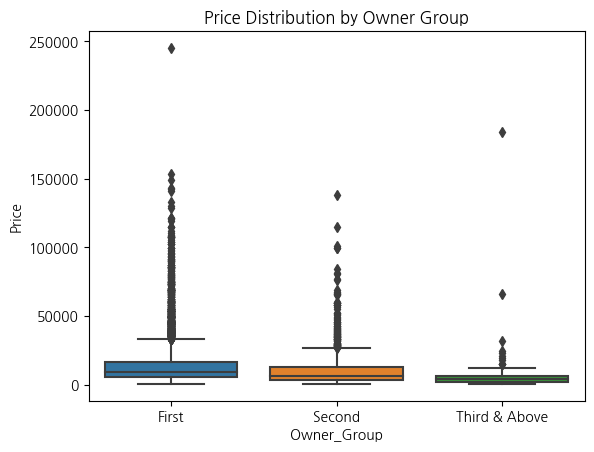

In [224]:
sns.boxplot(x='Owner_Group', y='Price', data=df)
plt.title('Price Distribution by Owner Group')
plt.xlabel('Owner_Group')
plt.ylabel('Price')
plt.show()

### First, Second는 그대로, Third & Above로 두 범주 합친 결과 도시화

First와 Third & Above의 이상치 데이터 확인 필요

In [22]:
out_first = df[(df['Owner_Group'] == 'First') & (df['Price'] > 200000)]

out_third = df[(df['Owner_Group'] == 'Third & Above') & (df['Price'] > 150000)]

df_outlier = pd.concat([out_first, out_third], ignore_index=True)
display(df_outlier)

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/L),Engine(CC),Power(bhp),Brand,Country,Continent,Price_Cat,City_population,Name,Fuel_Group,Owner_Group,Seat_Group
0,Hyderabad,245273.6,2017,25000,Diesel,Automatic,First,5.0,13.33,2993.0,255.0,Land-Rover,India,Asia,c5,10534,Land Rover Range Rover 3.0 Diesel LWB Vogue,Diesel,First,small
1,Delhi,183955.2,2011,6500,Petrol,Automatic,Third,2.0,6.40,5204.0,560.0,Lamborghini,Italy,Europe,c5,32066,Lamborghini Gallardo Coupe,Petrol,Third & Above,small


#### df_outlier에 이상치 확인해야 하는 값들 정리 <br> 람보르기니, 랜드로버 데이터 확인 필요

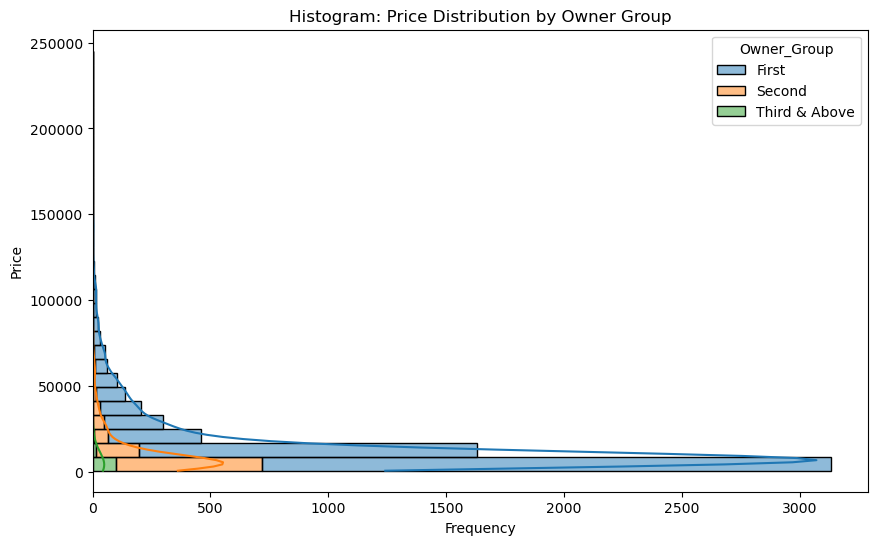

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, y='Price', hue='Owner_Group', multiple='stack', bins=30, kde=True)
plt.title('Histogram: Price Distribution by Owner Group')
plt.xlabel('Frequency')
plt.ylabel('Price')
plt.show()

# Seats

<Axes: xlabel='Seats', ylabel='count'>

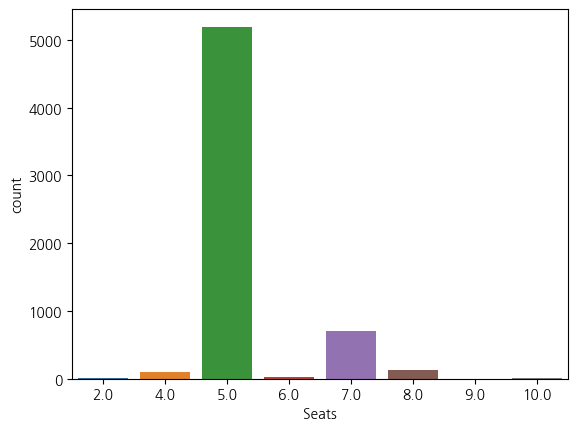

In [226]:
sns.countplot(x='Seats', data=df)

<Axes: >

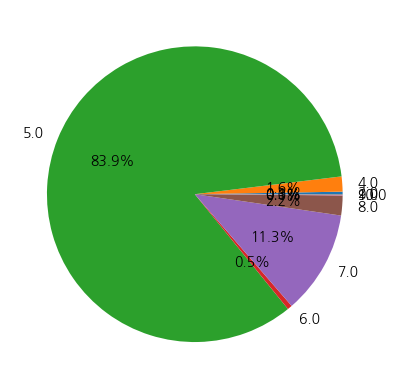

In [227]:
df_count = df.groupby(['Seats']).size()
df_count.plot.pie(y='Price', autopct='%.1f%%')

#### 5인승 이하는 small로 <br>6인승 초과는 large로 포함하여 다시 그래프 그림

<Axes: >

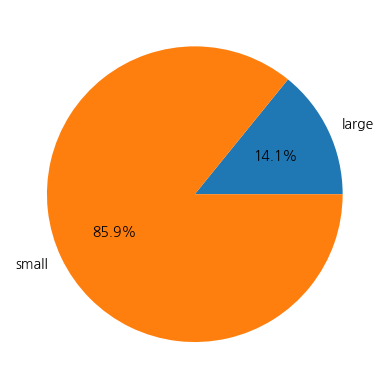

In [228]:
df_count = df.groupby(['Seat_Group']).size()
df_count.plot.pie(y='Price', autopct='%.1f%%')

In [29]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

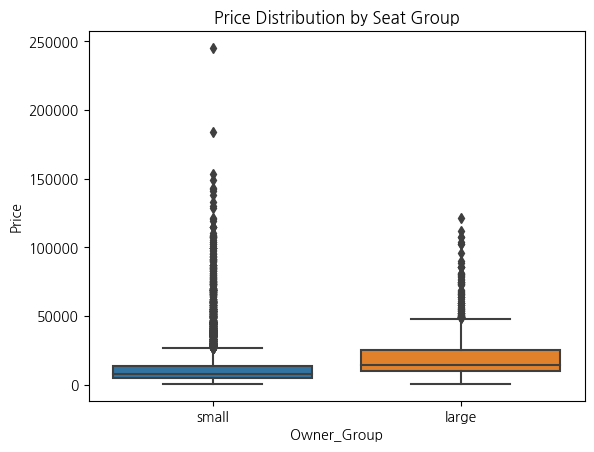

In [39]:
sns.boxplot(x='Seat_Group', y='Price', data=df)
plt.title('Price Distribution by Seat Group')
plt.xlabel('Owner_Group')
plt.ylabel('Price')
plt.show()

#### small의 2개의 이상치가 이전에 이상치로 분류한 dataframe에 포함되어 있었으므로 df_outlier 변경 안함

In [37]:
out_small = df[(df['Seat_Group'] == 'small') & (df['Price'] > 170000) & (df['Price'] < 200000)]
out_small

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/L),Engine(CC),Power(bhp),Brand,Country,Continent,Price_Cat,City_population,Name,Fuel_Group,Owner_Group,Seat_Group
5779,Delhi,183955.2,2011,6500,Petrol,Automatic,Third,2.0,6.4,5204.0,560.0,Lamborghini,Italy,Europe,c5,32066,Lamborghini Gallardo Coupe,Petrol,Third & Above,small


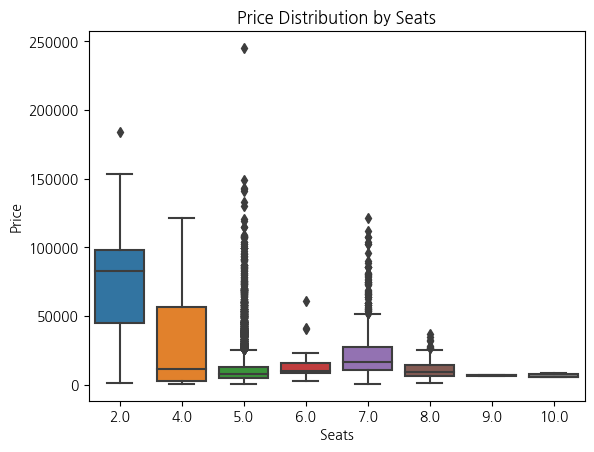

In [41]:
sns.boxplot(x='Seats', y='Price', data=df)
plt.title('Price Distribution by Seats')
plt.xlabel('Seats')
plt.ylabel('Price')
plt.show()

# 마일리지

<Axes: xlabel='Mileage(km/L)', ylabel='Density'>

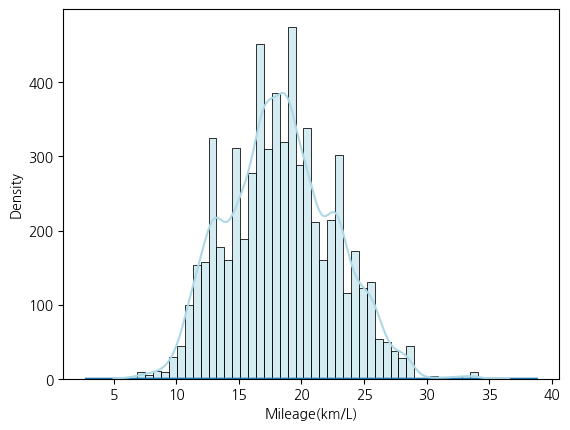

In [232]:
sns.kdeplot(df['Mileage(km/L)'], fill=False)  # 커널 밀도 추정 그림
sns.histplot(df['Mileage(km/L)'], color='lightblue', kde=True)  # 히스토그램 그림

/tmp/ipykernel_5338/3749505089.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Mileage(km/L)', y='Price', data=df, palette='Set2')


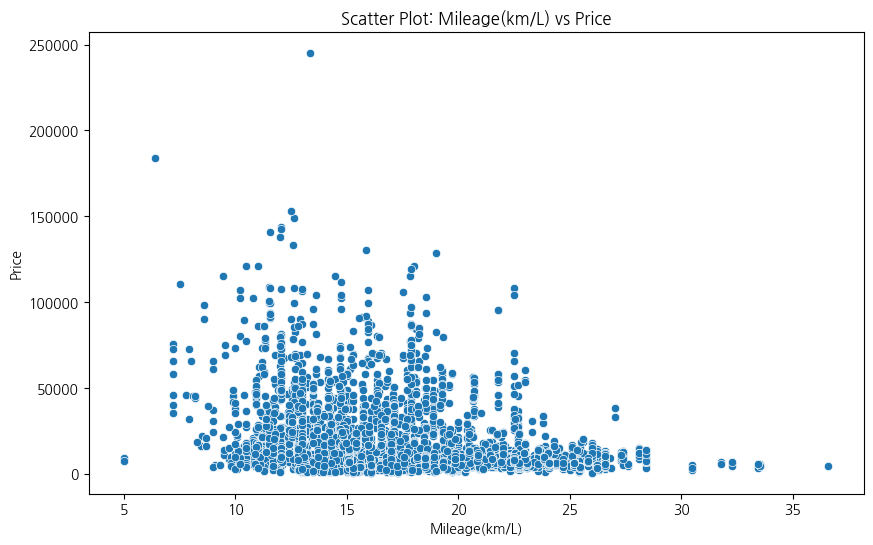

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage(km/L)', y='Price', data=df, palette='Set2')
plt.title('Scatter Plot: Mileage(km/L) vs Price')
plt.xlabel('Mileage(km/L)')
plt.ylabel('Price')
plt.show()

In [46]:
out_mileage = df[(df['Mileage(km/L)'] < 15) & (df['Price'] > 170000)]
out_mileage

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/L),Engine(CC),Power(bhp),Brand,Country,Continent,Price_Cat,City_population,Name,Fuel_Group,Owner_Group,Seat_Group
4079,Hyderabad,245273.6,2017,25000,Diesel,Automatic,First,5.0,13.33,2993.0,255.0,Land-Rover,India,Asia,c5,10534,Land Rover Range Rover 3.0 Diesel LWB Vogue,Diesel,First,small
5779,Delhi,183955.2,2011,6500,Petrol,Automatic,Third,2.0,6.40,5204.0,560.0,Lamborghini,Italy,Europe,c5,32066,Lamborghini Gallardo Coupe,Petrol,Third & Above,small


# Engine(CC)

<Axes: xlabel='Engine(CC)', ylabel='Density'>

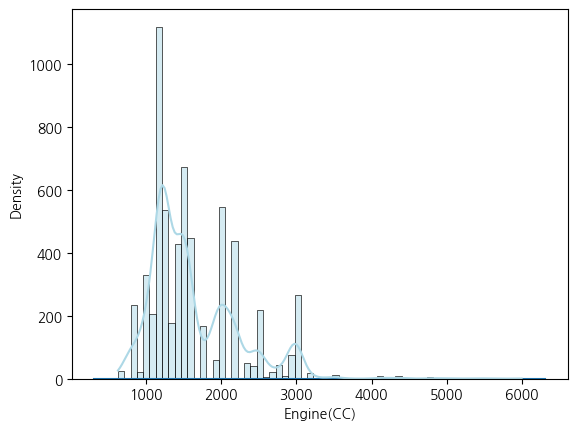

In [44]:
sns.kdeplot(df['Engine(CC)'], fill=False)  # 커널 밀도 추정 그림
sns.histplot(df['Engine(CC)'], color='lightblue', kde=True)  # 히스토그램 그림

/tmp/ipykernel_5338/924925323.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Engine(CC)', y='Price', data=df, palette='Set2')


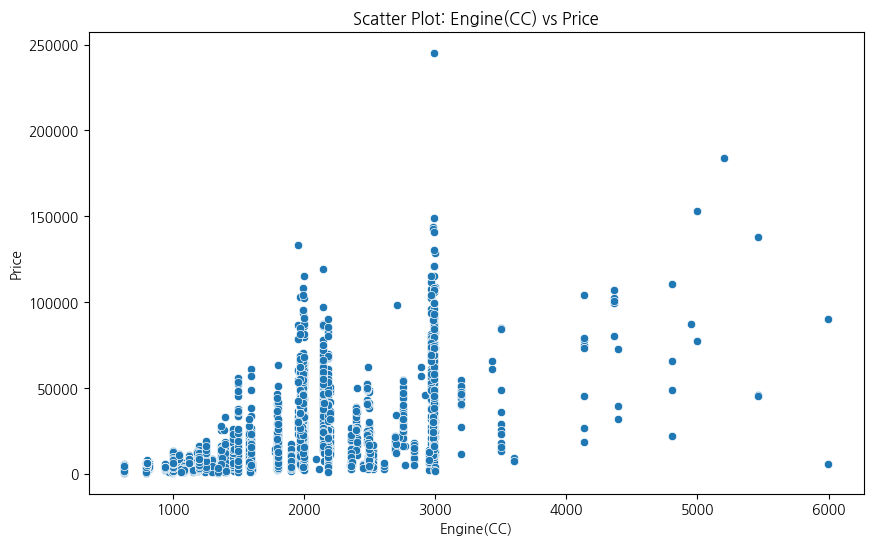

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine(CC)', y='Price', data=df, palette='Set2')
plt.title('Scatter Plot: Engine(CC) vs Price')
plt.xlabel('Engine(CC)')
plt.ylabel('Price')
plt.show()

Engine(CC)와 Price의 값에 따라 이상치로 확인되는 데이터에 대해 데이터를 나눠놓음

In [50]:
out_engine = df[(df['Engine(CC)'] > 5300) & (df['Price'] < 70000)]
out_engine

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/L),Engine(CC),Power(bhp),Brand,Country,Continent,Price_Cat,City_population,Name,Fuel_Group,Owner_Group,Seat_Group
152,Kolkata,45988.80,2010,35277,Petrol,Automatic,First,5.0,7.81,5461.0,362.9,Mercedes-Benz,Germany,Europe,c5,15134,Mercedes-Benz S Class 2005 2013 S 500,Petrol,First,small
4721,Kolkata,45222.32,2010,35000,Petrol,Automatic,First,2.0,8.10,5461.0,387.3,Mercedes-Benz,Germany,Europe,c5,15134,Mercedes-Benz SL-Class SL 500,Petrol,First,small
6062,Bangalore,5748.60,2008,31200,Petrol,Automatic,Second,5.0,10.20,5998.0,616.0,Bentley,UK,Europe,c2,13193,Maruti Ciaz 1.4 Zeta,Petrol,Second,small


In [51]:
df_outlier = pd.concat([df_outlier, out_engine], ignore_index=True)
df_outlier

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/L),Engine(CC),Power(bhp),Brand,Country,Continent,Price_Cat,City_population,Name,Fuel_Group,Owner_Group,Seat_Group
0,Hyderabad,245273.60,2017,25000,Diesel,Automatic,First,5.0,13.33,2993.0,255.0,Land-Rover,India,Asia,c5,10534,Land Rover Range Rover 3.0 Diesel LWB Vogue,Diesel,First,small
1,Delhi,183955.20,2011,6500,Petrol,Automatic,Third,2.0,6.40,5204.0,560.0,Lamborghini,Italy,Europe,c5,32066,Lamborghini Gallardo Coupe,Petrol,Third & Above,small
2,Kolkata,45988.80,2010,35277,Petrol,Automatic,First,5.0,7.81,5461.0,362.9,Mercedes-Benz,Germany,Europe,c5,15134,Mercedes-Benz S Class 2005 2013 S 500,Petrol,First,small
3,Kolkata,45222.32,2010,35000,Petrol,Automatic,First,2.0,8.10,5461.0,387.3,Mercedes-Benz,Germany,Europe,c5,15134,Mercedes-Benz SL-Class SL 500,Petrol,First,small
4,Bangalore,5748.60,2008,31200,Petrol,Automatic,Second,5.0,10.20,5998.0,616.0,Bentley,UK,Europe,c2,13193,Maruti Ciaz 1.4 Zeta,Petrol,Second,small


In [59]:
df_outlier.to_csv('df_outlier.csv', index=False)

# Power(bhp)

<Axes: xlabel='Power(bhp)', ylabel='Density'>

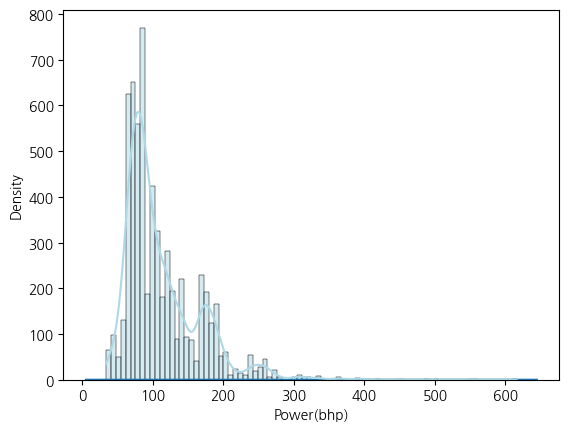

In [52]:
sns.kdeplot(df['Power(bhp)'], fill=False)
sns.histplot(df['Power(bhp)'], color='lightblue', kde=True)

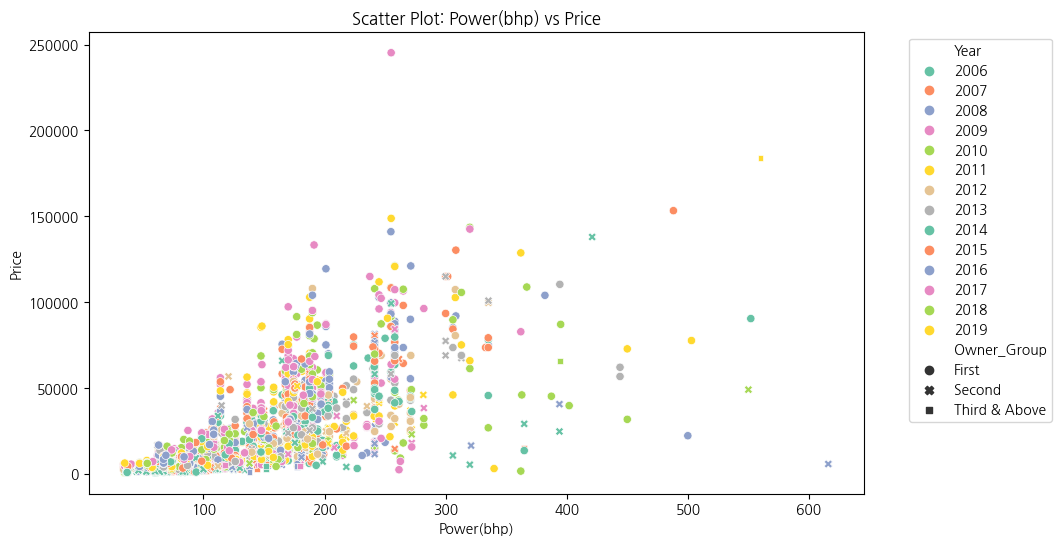

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Power(bhp)', y='Price', data=df, hue='Year', style='Owner_Group', palette='Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Scatter Plot: Power(bhp) vs Price')
plt.xlabel('Power(bhp)')
plt.ylabel('Price')
plt.show()

In [57]:
out_power = df[(df['Power(bhp)'] > 500) & (df['Price'] < 50000)]
df_outlier = pd.concat([df_outlier, out_power], ignore_index=True)
df_outlier

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/L),Engine(CC),Power(bhp),Brand,Country,Continent,Price_Cat,City_population,Name,Fuel_Group,Owner_Group,Seat_Group
0,Hyderabad,245273.60,2017,25000,Diesel,Automatic,First,5.0,13.33,2993.0,255.0,Land-Rover,India,Asia,c5,10534,Land Rover Range Rover 3.0 Diesel LWB Vogue,Diesel,First,small
1,Delhi,183955.20,2011,6500,Petrol,Automatic,Third,2.0,6.40,5204.0,560.0,Lamborghini,Italy,Europe,c5,32066,Lamborghini Gallardo Coupe,Petrol,Third & Above,small
2,Kolkata,45988.80,2010,35277,Petrol,Automatic,First,5.0,7.81,5461.0,362.9,Mercedes-Benz,Germany,Europe,c5,15134,Mercedes-Benz S Class 2005 2013 S 500,Petrol,First,small
3,Kolkata,45222.32,2010,35000,Petrol,Automatic,First,2.0,8.10,5461.0,387.3,Mercedes-Benz,Germany,Europe,c5,15134,Mercedes-Benz SL-Class SL 500,Petrol,First,small
4,Bangalore,5748.60,2008,31200,Petrol,Automatic,Second,5.0,10.20,5998.0,616.0,Bentley,UK,Europe,c2,13193,Maruti Ciaz 1.4 Zeta,Petrol,Second,small
5,Mumbai,49054.72,2010,35000,Petrol,Automatic,Second,5.0,11.90,4806.0,550.0,Porsche,Germany,Europe,c5,20961,Porsche Cayenne Turbo S,Petrol,Second,small
6,Bangalore,5748.60,2008,31200,Petrol,Automatic,Second,5.0,10.20,5998.0,616.0,Bentley,UK,Europe,c2,13193,Maruti Ciaz 1.4 Zeta,Petrol,Second,small


# 상관관계

/tmp/ipykernel_22000/1955047710.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(items[feature[i]].values, bins=40, label=index)
/tmp/ipykernel_22000/1955047710.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(items[feature[i]].values, bins=40, label=index)
/tmp/ipykernel_22000/195504771

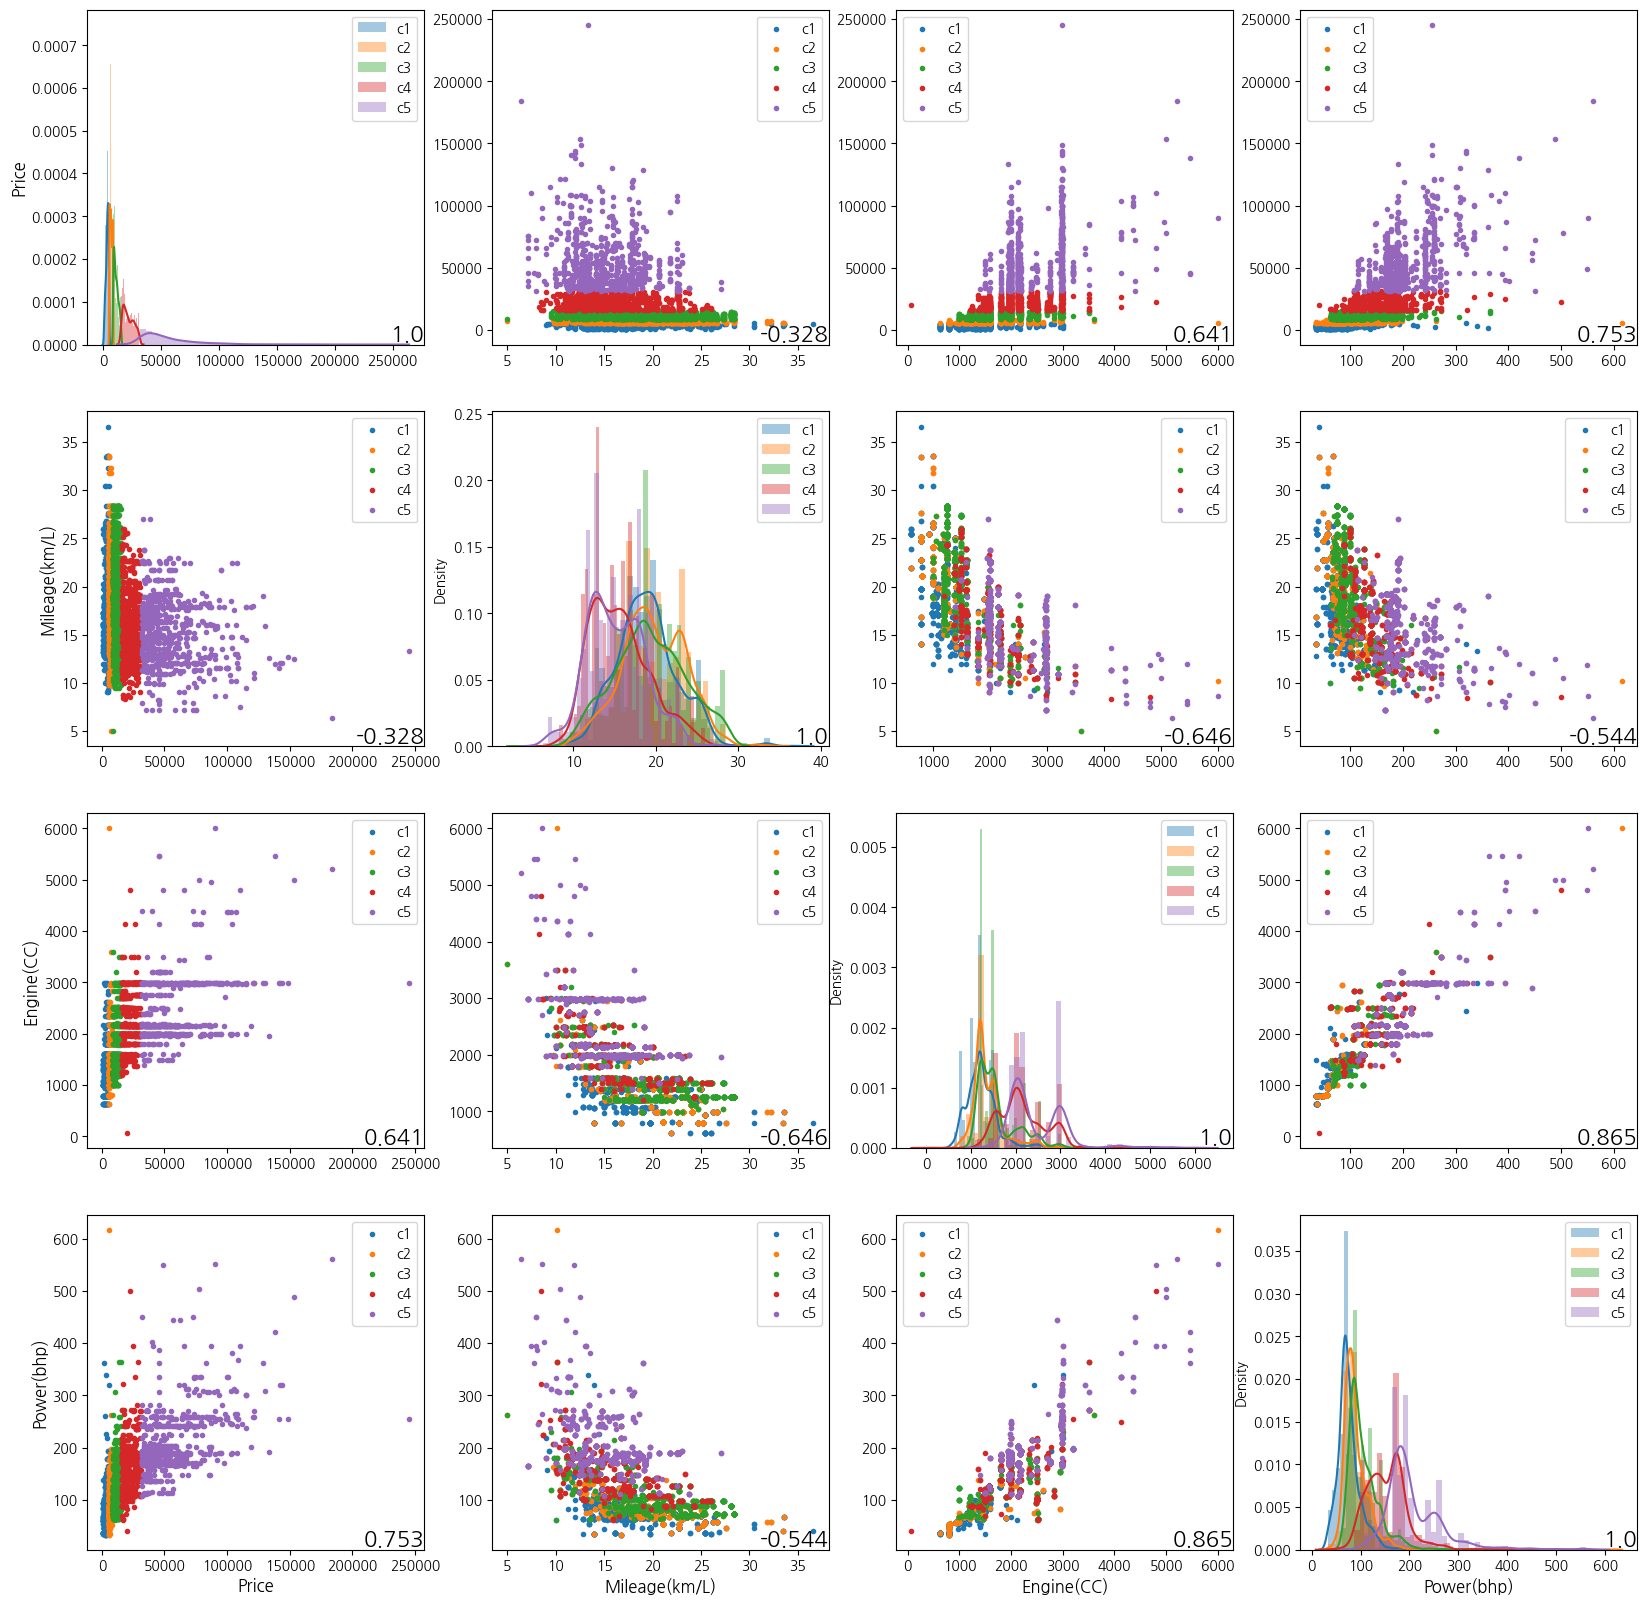

In [243]:
feature = ['Price', 'Mileage(km/L)', 'Engine(CC)', 'Power(bhp)']

corr_feature = df[feature].corr()

fig = plt.figure(figsize=(20,20))

n_feature = len(feature)
for i in range(n_feature):
    for j in range(n_feature):
        ax = fig.add_subplot(n_feature, n_feature, i*n_feature + j + 1)
        
        grouped = df.groupby('Price_Cat')
        for index, items in grouped:
            if i == j:
                sns.distplot(items[feature[i]].values, bins=40, label=index)
            else:
                plt.scatter(feature[j], feature[i], data=items, s=9, label=index)
                
            plt.legend()
        if i == n_feature-1:
            plt.xlabel(feature[j], fontsize=12)
        if j == 0:
            plt.ylabel(feature[i], fontsize=12)
        ax.annotate(np.round(corr_feature.loc[feature[i], feature[j]], 3), xy=(1, 0), xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', verticalalignment='bottom')
        
plt.show()


Location	Price	Year	Kilometers_Driven	Fuel_Type	Transmission	Owner_Type	Seats	Mileage(km/L)	Engine(CC)	Power(bhp)	Brand	Country	Continent	Price_Cat	City_population	Seat_group

In [244]:
df

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(km/L),Engine(CC),Power(bhp),Brand,Country,Continent,Price_Cat,City_population,Fuel_Group,Owner_Group,Seat_Group,Name
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,Maruti,India,Asia,c1,20961,etc,First,small,Maruti Wagon R LXI CNG
1,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,Hyundai,Korea,Asia,c4,6987,Diesel,First,small,Hyundai Creta 1.6 CRDi SX Option
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,Honda,Japan,Asia,c2,11503,Petrol,First,small,Honda Jazz V
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,Maruti,India,Asia,c3,11503,Diesel,First,large,Maruti Ertiga VDI
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,Audi,Germany,Europe,c4,2935,Diesel,Second,small,Audi A4 New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6186,Chennai,8477.27,2016,36000,Petrol,Manual,First,5.0,19.83,1198.0,67.00,Datsun,Japan,Asia,c2,11503,Petrol,First,small,Mercedes-Benz S Class 2005 2013 S 350 L
6187,Pune,10822.70,2016,41413,Diesel,Manual,First,5.0,27.28,1047.0,69.00,Tata,India,Asia,c3,6987,Diesel,First,small,Volkswagen Vento 1.5 TDI Highline
6188,Kochi,13474.72,2017,39015,Petrol,Manual,First,5.0,17.00,1497.0,121.36,Ford,USA,America,c3,3301,Petrol,First,small,Mercedes-Benz E-Class E250 CDI Avantgrade
6189,Mumbai,27838.55,2018,6000,Petrol,Manual,First,5.0,16.00,1368.0,160.00,Jeep,USA,America,c4,20961,Petrol,First,small,Toyota Etios V


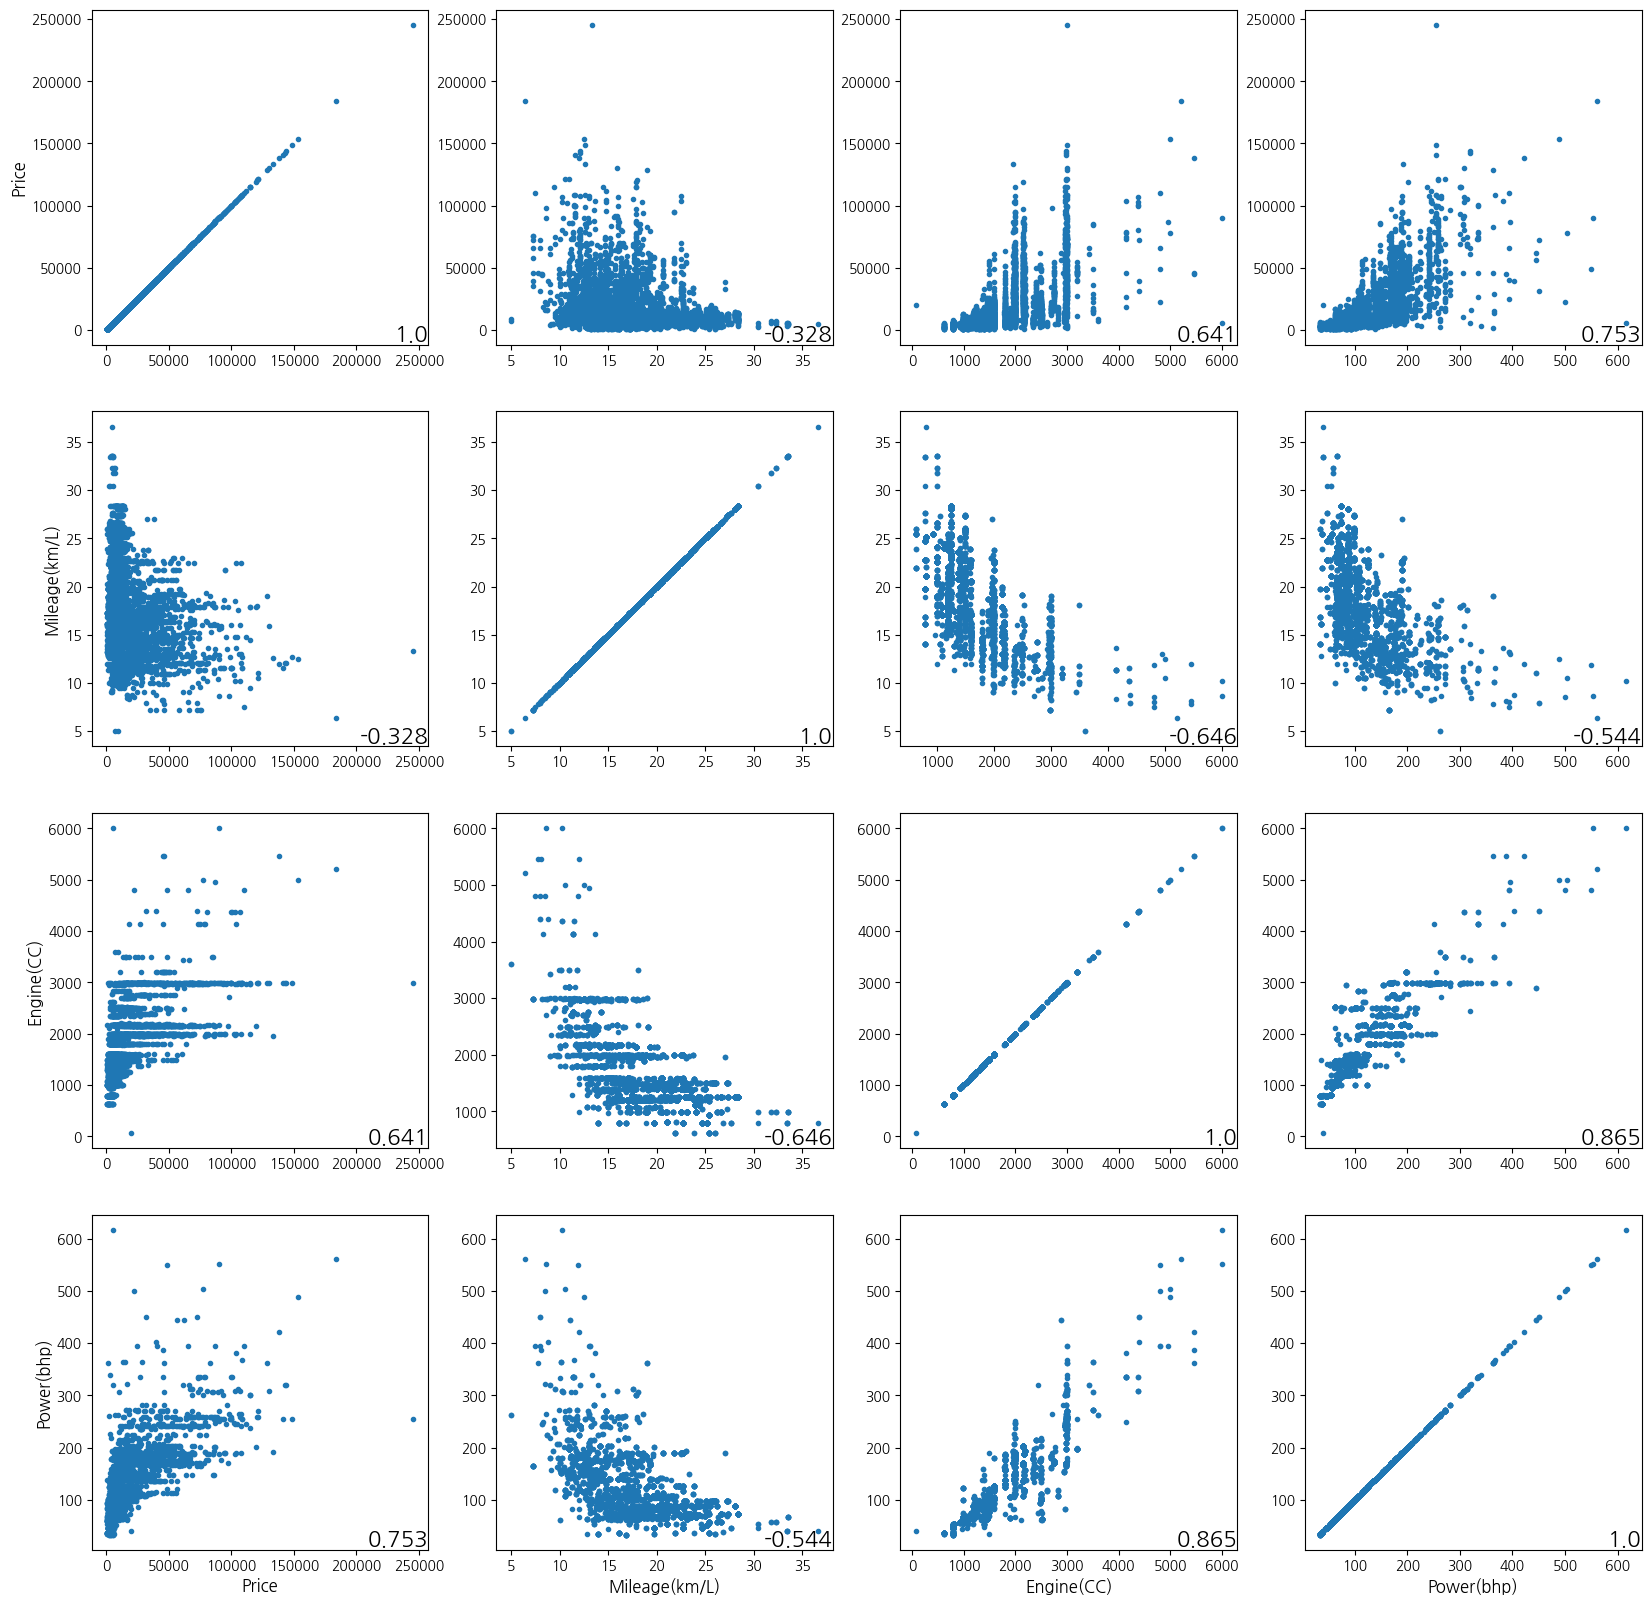

In [245]:
feature = ['Price', 'Mileage(km/L)', 'Engine(CC)', 'Power(bhp)', 'Kilometers_Driven' ]

corr_feature = df[feature].corr()

fig = plt.figure(figsize=(20,20))

n_feature = len(feature)
for i in range(n_feature):
    for j in range(n_feature):
        ax = fig.add_subplot(n_feature, n_feature, i*n_feature + j + 1)
        plt.scatter(feature[j], feature[i], data=df, s=9)
        if i == n_feature-1:
            plt.xlabel(feature[j], fontsize=12)
        if j == 0:
            plt.ylabel(feature[i], fontsize=12)
        ax.annotate(np.round(corr_feature.loc[feature[i], feature[j]], 3), xy=(1,0),
                    xycoords='axes fraction', fontsize=16, horizontalalignment='right',
                    verticalalignment='bottom')
        
plt.show()


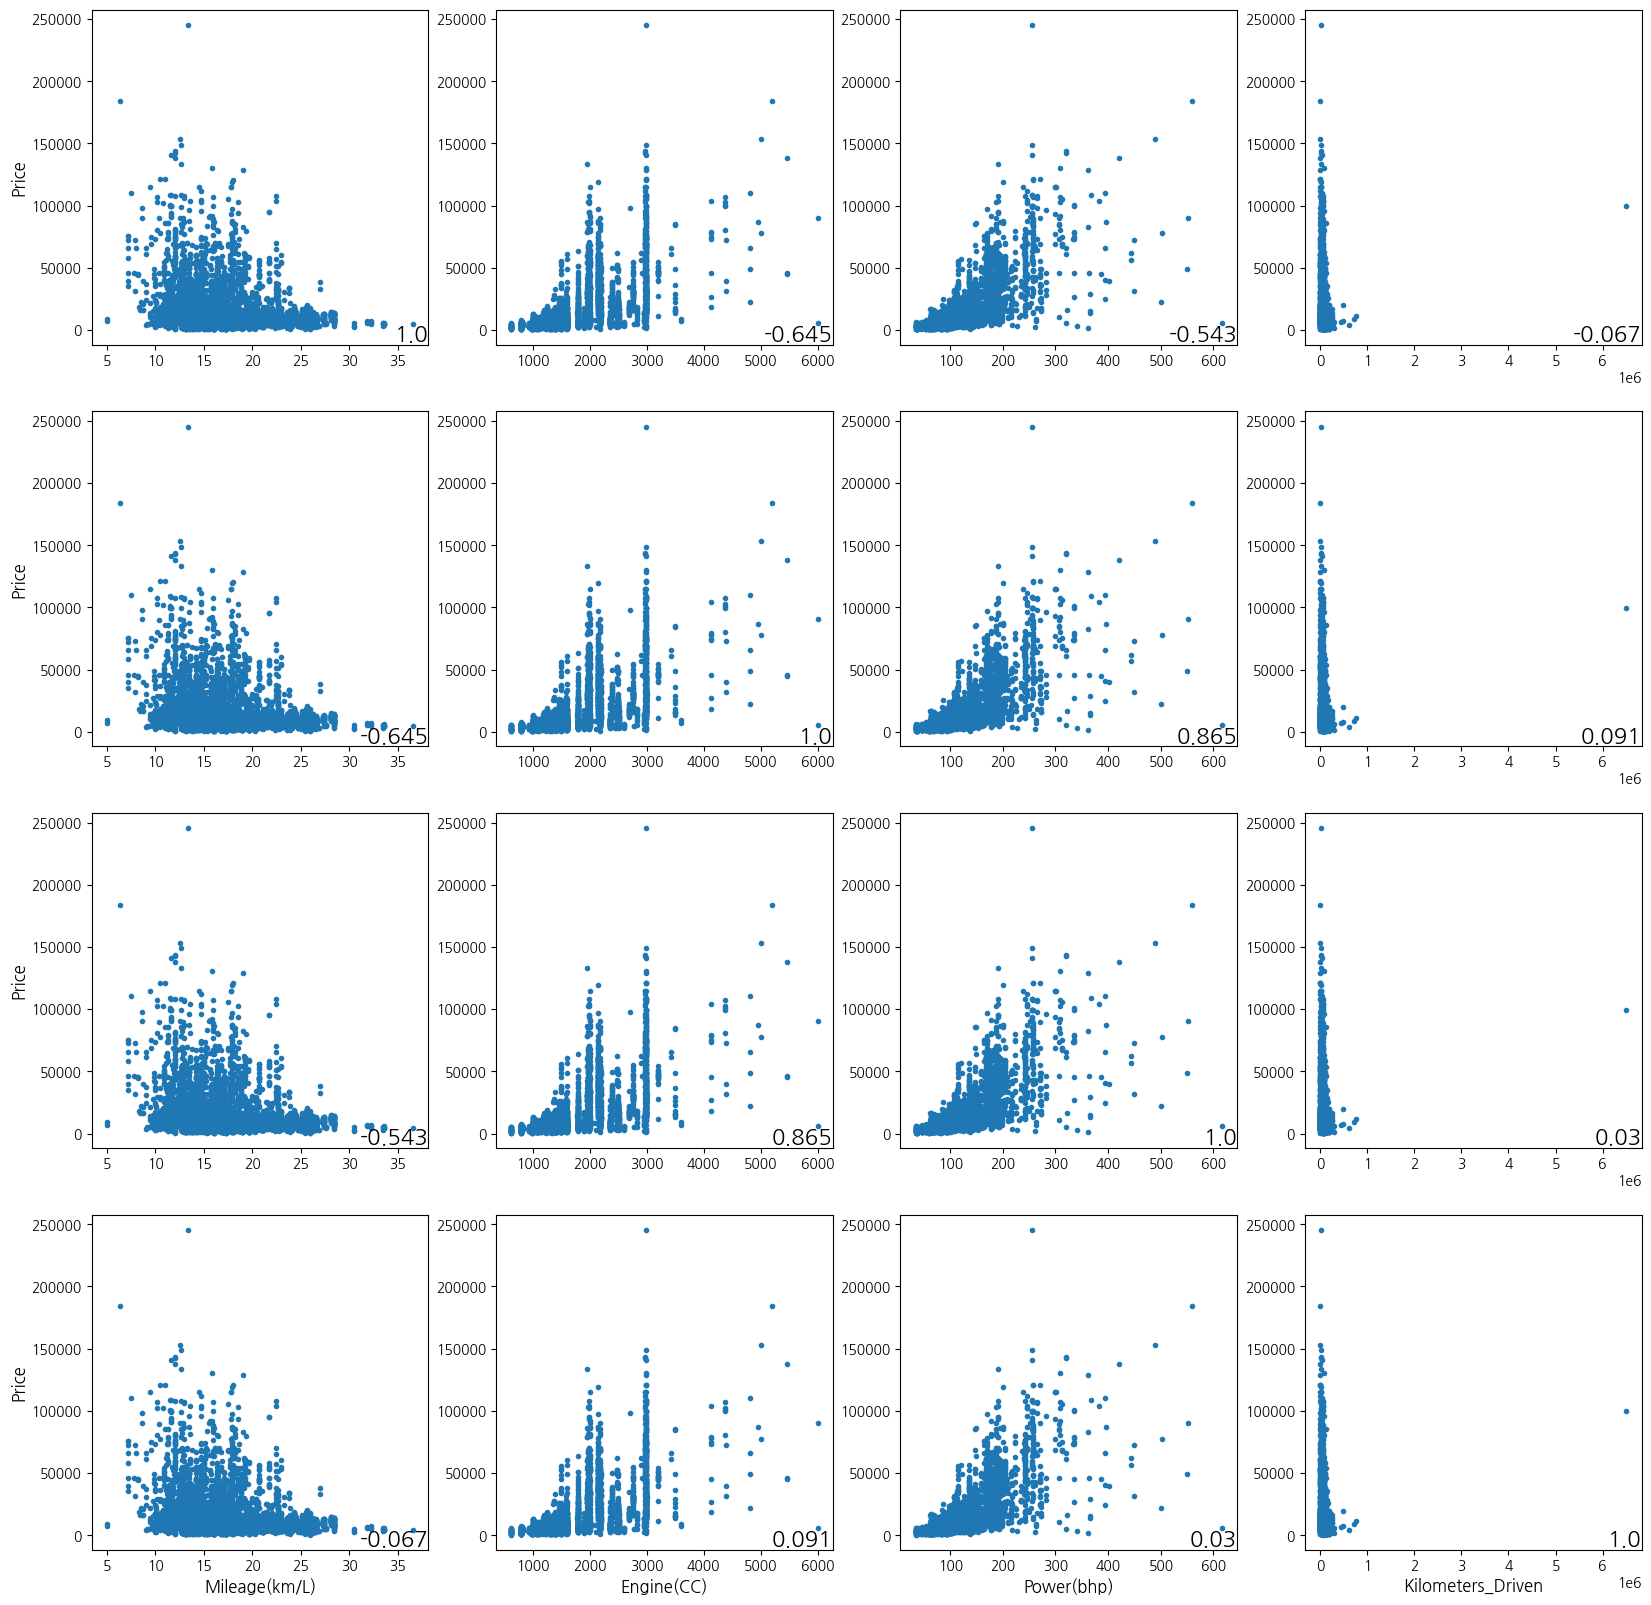

In [60]:
import matplotlib.pyplot as plt
import numpy as np

feature = ['Mileage(km/L)', 'Engine(CC)', 'Power(bhp)', 'Kilometers_Driven']

corr_feature = df[feature].corr()

fig = plt.figure(figsize=(20,20))

n_feature = len(feature)
for i in range(n_feature):
    for j in range(n_feature):
        ax = fig.add_subplot(n_feature, n_feature, i*n_feature + j + 1)
        plt.scatter(df[feature[j]], df['Price'], s=9)
        if i == n_feature-1:
            plt.xlabel(feature[j], fontsize=12)
        if j == 0:
            plt.ylabel('Price', fontsize=12)
        ax.annotate(np.round(corr_feature.loc[feature[i], feature[j]], 3), xy=(1,0),
                    xycoords='axes fraction', fontsize=16, horizontalalignment='right',
                    verticalalignment='bottom')
        
plt.show()

/tmp/ipykernel_5338/2830941970.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  axs[j].annotate(np.round(df.corr().loc[feature[j], 'Price'], 3), xy=(1,0),


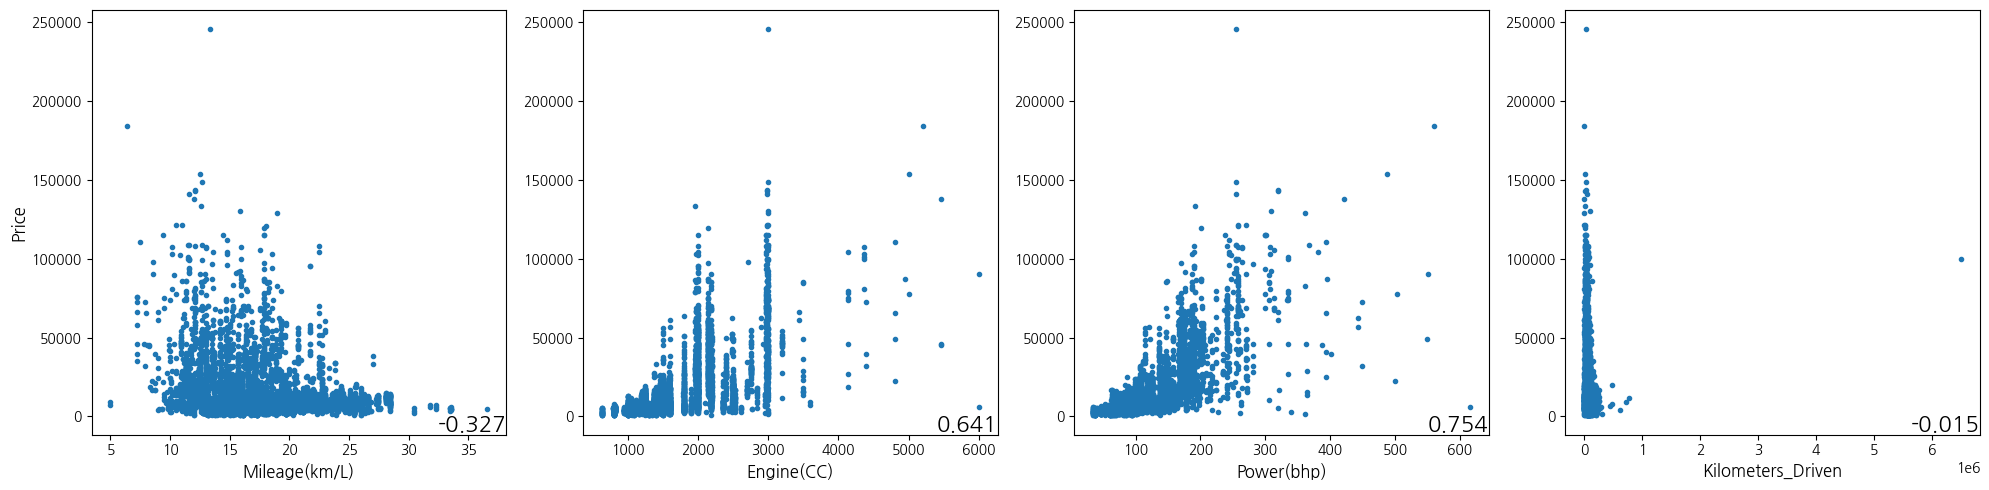

In [66]:
import matplotlib.pyplot as plt
import numpy as np

feature = ['Mileage(km/L)', 'Engine(CC)', 'Power(bhp)', 'Kilometers_Driven']

fig, axs = plt.subplots(1, len(feature), figsize=(20, 5))

for j in range(len(feature)):
    axs[j].scatter(df[feature[j]], df['Price'], s=9)
    axs[j].set_xlabel(feature[j], fontsize=12)
    if j == 0:
        axs[j].set_ylabel('Price', fontsize=12)
    axs[j].annotate(np.round(df.corr().loc[feature[j], 'Price'], 3), xy=(1,0),
                    xycoords='axes fraction', fontsize=16, horizontalalignment='right',
                    verticalalignment='bottom')

plt.tight_layout()
plt.show()